# Prediction of female-headed households in RSA using XGBoost
pip install cmake
pip install xgboost

In [1]:
# import libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from xgboost import XGBRFRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

RSEED = 42

/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# import data
df = pd.read_csv("Train.csv")

In [ ]:
#define X and y values
X = df.drop(['target', 'ward', 'ADM4_PCODE'], axis=1)
y = df["target"]

In [ ]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

## XGBoost with all features

In [ ]:
# train GDBT regressor
xgb =  XGBRFRegressor(random_state=RSEED)
xgb.fit(X, y)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [ ]:
#evaluation metrics
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {r2_score(y_test, y_pred)}")


In [ ]:
# plot residuals

## XGBoost with selected features

selected features derive from the feature importance in a random forest model

In [ ]:
# correlation
corr = df.corr()
corr_list = corr[abs(corr["target"]) > 0.5]
corr_list = corr_list.sort_values("target").index.values.tolist()
corr_list.remove("target")
corr_list

In [3]:
#define X (with selected values) and y values
X = df[["psa_00", "car_01", "pw_00", "lln_01","pg_00", "dw_10"]]
#X = df[corr_list]
y = df["target"]

In [4]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

In [5]:
# train XGBoost regressor
xgb = XGBRFRegressor(random_state=RSEED, gamma= 1, max_depth= 6, min_child_weight= 2)
xgb.fit(X, y)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [6]:
#evaluation metrics
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {r2_score(y_test, y_pred)}")

RMSE: 3.879198800631427
R2: 0.849583755004954


In [18]:
xgb.get_params()

{'colsample_bynode': 0.8,
 'learning_rate': 1.0,
 'reg_lambda': 1e-05,
 'subsample': 0.8,
 'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 100,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'scale_pos_weight': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='target'>

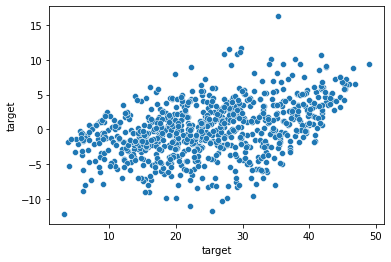

In [9]:
residuals = y_test - y_pred
sns.scatterplot(y_test, residuals)

## Gridsearch for best hyperparameters

In [ ]:
gbdt.get_params().keys()

'n_estimators': np.arange(100, 1000, 10)

In [7]:
# Defining parameter grid (as dictionary)
param_grid = {'gamma': [0, 1, 10, 100],
 'max_depth': [3, 4, 5, 6],
 'min_child_weight': [1, 2]
}

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(XGBRFRegressor(random_state=RSEED), param_grid, scoring='r2',
                  cv=5, n_jobs=-1)

# Fit gridsearch object to data
gs.fit(X_train, y_train)

/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/pandas

GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bytree=None,
                                      enable_categorical=False, gamma=None,
                                      gpu_id=None, importance_type=None,
                                      interaction_constraints=None,
                                      max_delta_step=None, max_depth=None,
                                      min_child_weight=None, missing=nan,
                                      monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      predictor=None, random_state=42,
                                      reg_alpha=None, scale_pos_weight=None,
           

In [24]:
gs.best_params_

{'gamma': 1, 'max_depth': 6, 'min_child_weight': 2}